In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#!pip install pandas==1.3.5

In [ ]:
# Asegurate que tienes la versión 1.3.5 de pandas, sino instala esa versión
pd.__version__

In [11]:
# Descargate el repositorio de github en Colab 
def is_running_in_colab():
    try:
        import google.colab
        return True
    except:
        return False
if is_running_in_colab():
    !rm -rf investigacion_senescyt
    !git clone https://github.com/mayait/investigacion_senescyt.git
    !mv /content/investigacion_senescyt/pickles_partes .

In [131]:
# Funcion que une los archivos pickle en un solo dataframe
def unir_pickle(nombre, n):
    lista_dataframes = []
    for i in range(n):
        df = pd.read_pickle(nombre + str(i) + '.pkl')
        lista_dataframes.append(df)
    df_unido = pd.concat(lista_dataframes, ignore_index=True)
    return df_unido

In [132]:
# Importa postrulaciones desde los pickles
postulaciones = unir_pickle('pickles_partes/postulaciones_',36)

# Eliminar features

In [133]:
# ELIMINAR CAE_ESTADO tiene todo en 1 o activado
postulaciones.drop(['CAE_ESTADO'], axis=1, inplace=True)

In [134]:
# Elimina CAE_GRUPO, se repite con SEGMENTO_ASPIRANTE
postulaciones.drop(['CAE_GRUPO'], axis=1, inplace=True)

In [145]:
# CUS_ID	Codigo de cupos por segmentos NI IDEA
postulaciones.drop(['CUS_ID'], axis=1, inplace=True)

# Limpiar año postulación

In [135]:
# 6 millones de filas no tienen fecha de postulacion :(
postulaciones['POS_FECHA_POSTULACION'].isna().count()

6575956

In [143]:
# Todas las filas donde POS_ID es nulo o vacio o NAN
postulaciones[postulaciones['POS_ID'].isna()]


,Unnamed: 0,INS_ID,INI_ID,PER_ID,INS_POBLACION,INS_TIPO_INSCRIPCION,SEGMENTO_ASPIRANTE,CAE_NOTA_POSTULA,POS_ID,POS_FECHA_POSTULACION,...,SUBAREA_NOMBRE,PROVINCIA,CANTON,PARROQUIA,CAM_NOMBRE_CAMPUS,PRD_ID_SEGMENTO,SEGMETO_CARRERA,cod_final,archivo,ANO_POSTULACION


In [137]:
# Extrae el año de la columna POS_FECHA_POSTULACION usando expresiones regulares, los años posibles son 2018, 2019, 2020, 2021, 2022
postulaciones['ANO_POSTULACION'] = postulaciones['POS_FECHA_POSTULACION'].str.extract(r'(\d{4})', expand=False)

# Para todos los NAN de la columna ANO_POSTULACION, extraer el año de la columna archivo con expresiones regulares
# Transformando el valor 18 a 2018, 19 a 2019, 20 a 2020, 21 a 2021, 22 a 2022
postulaciones['ANO_POSTULACION'] = postulaciones['ANO_POSTULACION'].fillna(postulaciones['archivo'].str.extract(r'(\d{2})', expand=False))
postulaciones['ANO_POSTULACION'] = postulaciones['ANO_POSTULACION'].replace({'18':2018, '19':2019, '20':2020, '21':2021, '22':2022})

# Convierte la columna a tipo numérico
postulaciones['ANO_POSTULACION'] = pd.to_numeric(postulaciones['ANO_POSTULACION'], errors='coerce')

In [138]:
postulaciones.ANO_POSTULACION.value_counts()

2021    2929312
2020    2597192
2019    1046709
2018       2743
Name: ANO_POSTULACION, dtype: int64

In [139]:
# Elimina las filas menores a 2018
postulaciones = postulaciones[postulaciones['ANO_POSTULACION'] > 2018]

In [144]:
# Elimina POS_FECHA_POSTULACION
postulaciones.drop(['POS_FECHA_POSTULACION'], axis=1, inplace=True)

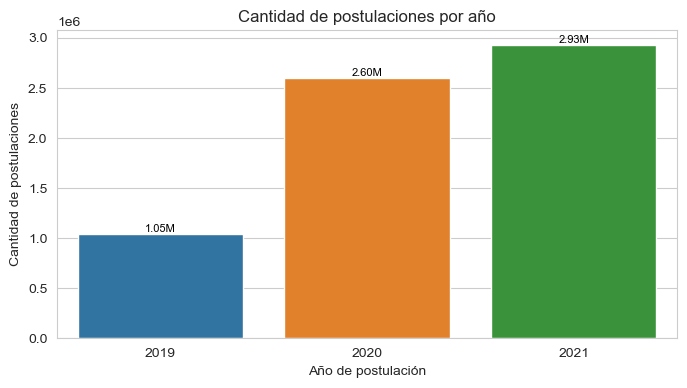

In [79]:
# Grafica la cantidad de postulantes por ano de postulación
plt.figure(figsize=(8,4))
sns.countplot(x='ANO_POSTULACION', data=postulaciones)
# cantidad en cada barra
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.2f}M'.format(p.get_height()/1000000), 
            fontsize=8, color='black', ha='center', va='bottom')
plt.title('Cantidad de postulaciones por año')
plt.xlabel('Año de postulación')
plt.ylabel('Cantidad de postulaciones')
plt.show()

# Nota de postulación

In [90]:
# Eliminar vacios en CAE_NOTA_POSTULA 
postulaciones = postulaciones[postulaciones['CAE_NOTA_POSTULA'].notna()]

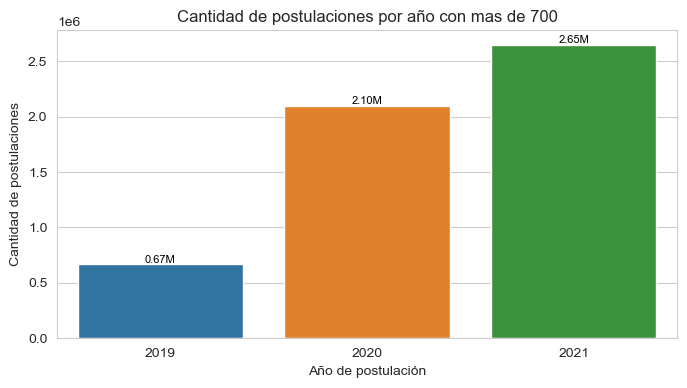

In [91]:
# Grafica la cantidad de postulantes por ano de postulación
plt.figure(figsize=(8,4))
sns.countplot(x='ANO_POSTULACION', data=postulaciones[postulaciones['CAE_NOTA_POSTULA'] > 700])
# cantidad en cada barra
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.2f}M'.format(p.get_height()/1000000), 
            fontsize=8, color='black', ha='center', va='bottom')
plt.title('Cantidad de postulaciones por año con mas de 700')
plt.xlabel('Año de postulación')
plt.ylabel('Cantidad de postulaciones')
plt.show()

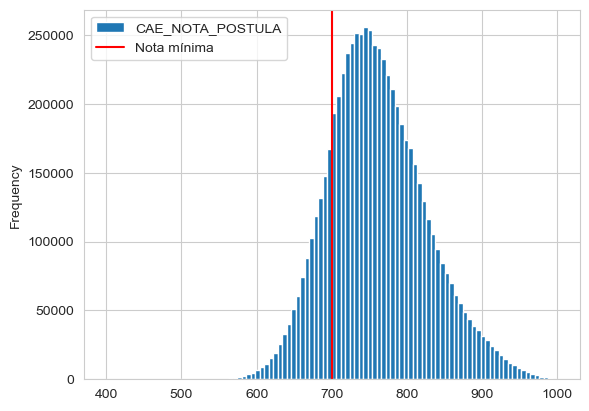

In [147]:
# grafica un histograma de la columna CAE_NOTA_POSTULA usando seaborn histplot

# Grafiquemos la distribución de los datos CAE_NOTA_POSTULA en postulaciones
postulaciones['CAE_NOTA_POSTULA'].plot.hist(bins=100)
# Pon una linea en 700 con la etiqueta nota minima
plt.axvline(700, color='red', label='Nota mínima')
plt.legend()
plt.show()

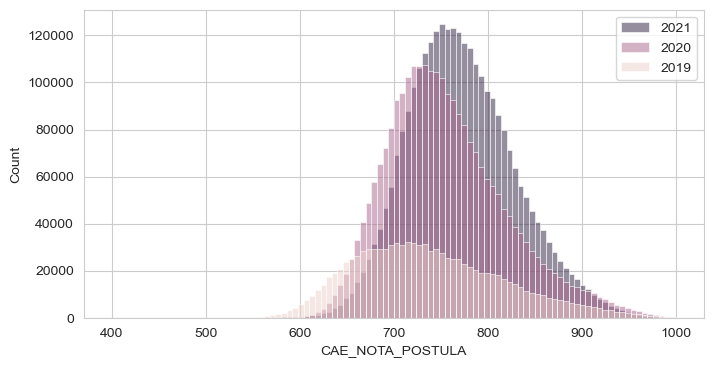

In [93]:
# Histogramas de CAE_NOTA_POSTULA por año sobrepuestos
plt.figure(figsize=(8,4))
sns.histplot(data=postulaciones, x='CAE_NOTA_POSTULA', hue='ANO_POSTULACION', bins=100)
plt.legend(labels=postulaciones['ANO_POSTULACION'].unique())
plt.show()

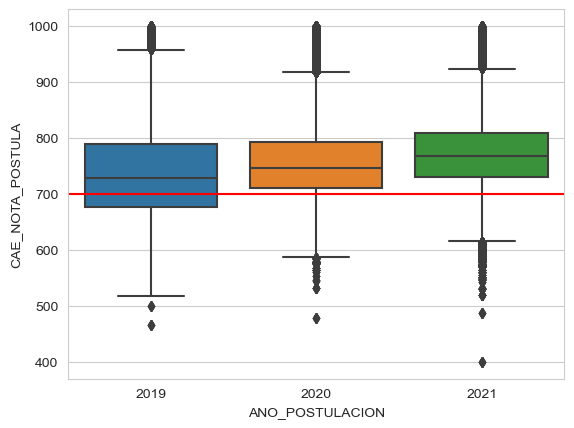

In [94]:
# Boxplot de CAE_NOTA_POSTULA por ANO_POSTULACION
sns.boxplot(x='ANO_POSTULACION', y='CAE_NOTA_POSTULA', data=postulaciones)
plt.axhline(700, color='red', label='Nota mínima')
plt.show()


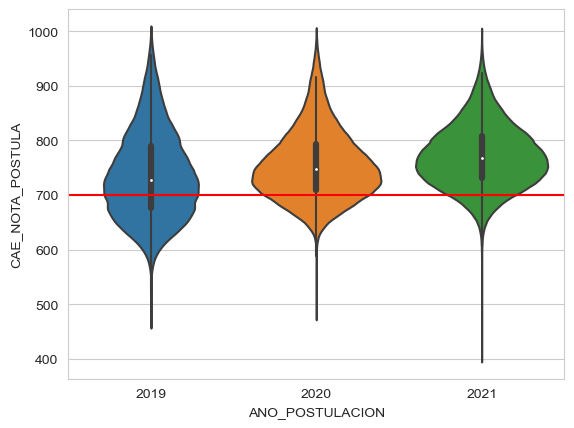

In [95]:
# Violin plot de CAE_NOTA_POSTULA por ANO_POSTULACION
sns.violinplot(x='ANO_POSTULACION', y='CAE_NOTA_POSTULA', data=postulaciones)
plt.axhline(700, color='red', label='Nota mínima')
plt.show()

In [151]:
# Todo lo que sea diferente de POBLACION GENERAL en SEGMENTO_ASPIRANTE lo convierto en ACCION AFIRMATIVA
postulaciones['SEGMENTO_ASPIRANTE'] = postulaciones['SEGMENTO_ASPIRANTE'].replace(
    {'POBLACION GENERAL': 'POBLACION GENERAL', 
     'GAR': 'ACCION AFIRMATIVA',
     'IES PARTICULAR': 'ACCION AFIRMATIVA',
     'MERITO TERRITORIAL': 'ACCION AFIRMATIVA',
     'POLITICA DE ACCION AFIRMATIVA': 'ACCION AFIRMATIVA'})
postulaciones['SEGMENTO_ASPIRANTE'].value_counts()

POBLACION GENERAL    4006717
ACCION AFIRMATIVA    2551677
Name: SEGMENTO_ASPIRANTE, dtype: int64

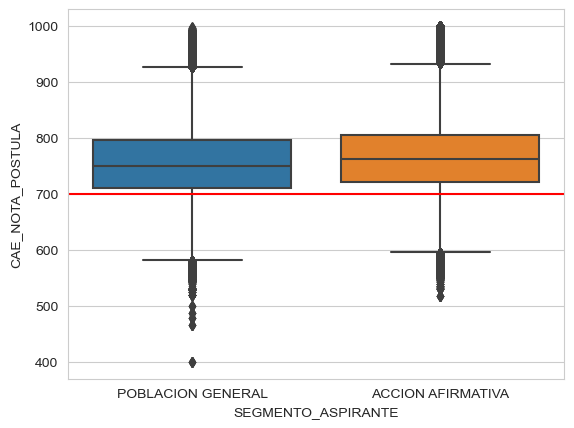

In [152]:
# Boxplot de CAE_NOTA_POSTULA por SEGMENTO_ASPIRANTE
sns.boxplot(x='SEGMENTO_ASPIRANTE', y='CAE_NOTA_POSTULA', data=postulaciones)
plt.axhline(700, color='red', label='Nota mínima')
plt.show()



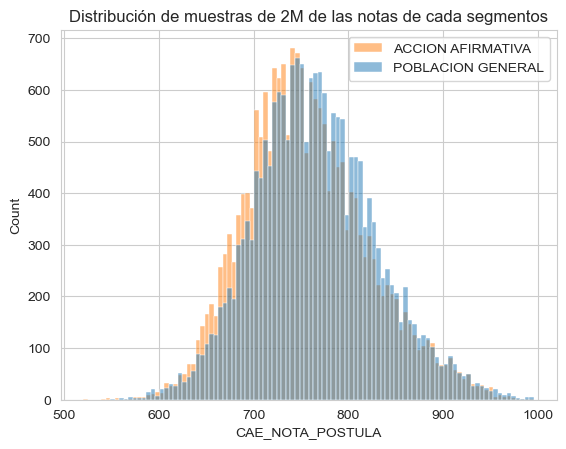

In [155]:
# Existe una diferencia significativa entre las notas de los segmentos de población?

# Tomo una muestra de 10000 de cada segmento
sample = postulaciones.groupby('SEGMENTO_ASPIRANTE').apply(lambda x: x.sample(20000))
# titulo del grafico
plt.title('Distribución de muestras de 2M de las notas de cada segmentos')
# Grafico la distribución de las notas de cada segmento
sns.histplot(data=sample, x='CAE_NOTA_POSTULA', hue='SEGMENTO_ASPIRANTE', bins=100)
plt.legend(labels=sample['SEGMENTO_ASPIRANTE'].unique())
plt.show()

## NOTA_POSTULA o CAE_NOTA_POSTULA
¿Nos quedamos con quien?
- **CAE_NOTA_POSTULA** nota mayor del ENES de los 3 últimos periodos incluido el actual / A partir del P17 almacena la Nota de postulación=CAE_NOTASB_MAS_ACCAFIRMATIVA, si la nota CAE_NOTASB_MAS_ACCAFIRMATIVA sobrepasa los 1000 puntos la nota de postulación será 1000 / A partir del p18 guarda nota ponderada SB y grado mas acciones afirmativas
- **NOTA_POSTULA** Nivel en el que se aceptó el cupo

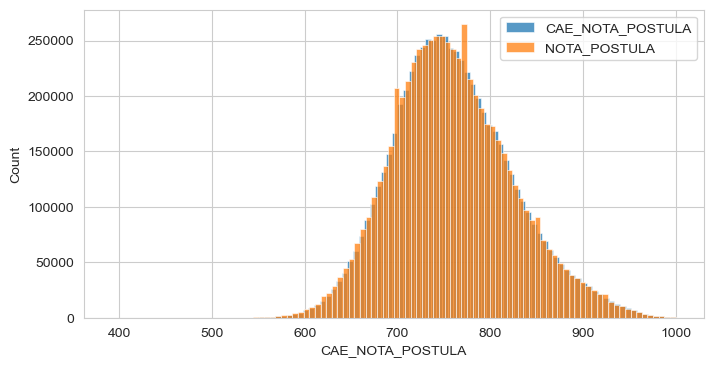

In [157]:
# Compara NOTA_POSTULA con CAE_NOTA_POSTULA en un mismo histograma
plt.figure(figsize=(8,4))
sns.histplot(data=postulaciones, x='CAE_NOTA_POSTULA', bins=100, label='CAE_NOTA_POSTULA')
sns.histplot(data=postulaciones, x='NOTA_POSTULA', bins=100, label='NOTA_POSTULA')
plt.legend()
plt.show()


In [159]:
# Calcula la diferencia entre las notas de CAE_NOTA_POSTULA y NOTA_POSTULA
postulaciones['DIF_NOTA'] = postulaciones['CAE_NOTA_POSTULA'] - postulaciones['NOTA_POSTULA']
# Grafica la diferencia de notas
postulaciones['DIF_NOTA'].describe()

count    6.558394e+06
mean     4.346390e-01
std      7.257582e+00
min     -1.380000e+02
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.660000e+02
Name: DIF_NOTA, dtype: float64